In [21]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='sentiment'>

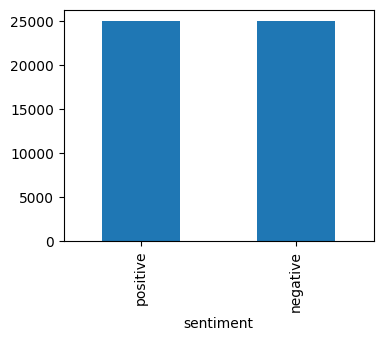

In [8]:
plt.figure(figsize=(4,3))
df['sentiment'].value_counts().plot(kind='bar')

In [12]:
stop_words = set(stopwords.words('english'))

In [17]:
pos_sen = list(df[df['sentiment']== 'positive']['review'])

In [20]:
neg_sen = list(df[df['sentiment'] == 'negative']['review'])

In [31]:
def create_cloud(string, title=None):
    cloud = WordCloud(
        height=400,
        width=900,
        background_color='green',
        min_font_size=10, 
            stopwords = stop_words
    ).generate(string)

    plt.figure(figsize=(10,5))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':15})
    plt.show()

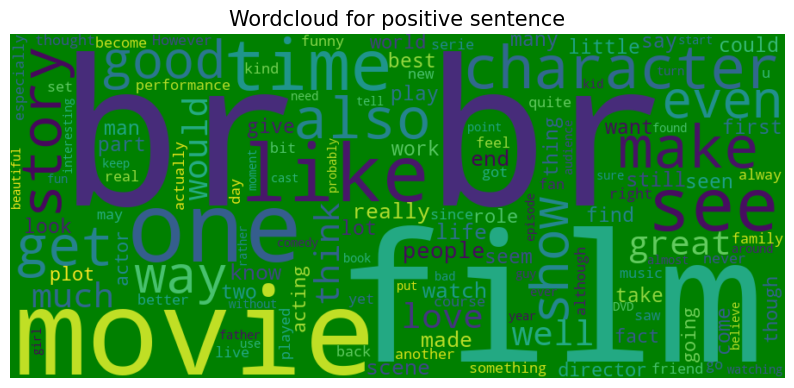

In [29]:
create_cloud(" ".join(pos_sen), 'Wordcloud for positive sentence')

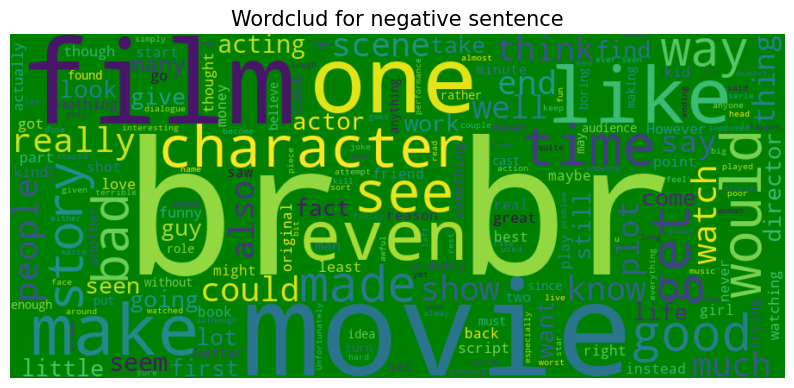

In [30]:
create_cloud(" ".join(neg_sen), 'Wordclud for negative sentence')